In [ ]:
# Ouer first langgraph graph

In [3]:
!pip install langgraph

  Obtaining dependency information for langgraph from https://files.pythonhosted.org/packages/17/8a/fe05ec63ee4c3889a8b89679a6bdd1be6087962818996f3b361da23a5529/langgraph-0.4.8-py3-none-any.whl.metadata
  Obtaining dependency information for langchain-core>=0.1 from https://files.pythonhosted.org/packages/54/f0/31db18b7b8213266aed926ce89b5bdd84ccde7ee2edf4cab14e3dd2bfcf1/langchain_core-0.3.65-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-checkpoint>=2.0.26 from https://files.pythonhosted.org/packages/0f/41/390a97d9d0abe5b71eea2f6fb618d8adadefa674e97f837bae6cda670bc7/langgraph_checkpoint-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-prebuilt>=0.2.0 from https://files.pythonhosted.org/packages/14/46/c98fec1f8620cbffbabda346a2c68155eec3720c6c3393ab3b9529618810/langgraph_prebuilt-0.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-sdk>=0.1.42 from https://files.pythonhosted.org/packages/8c/77/b0930

In [5]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [19]:
# creating an agentstate

class AgentState(TypedDict):  # our state schema
    message: str
    compliment: str

# creating a graph
def greeting_node(state: AgentState) -> AgentState:
    """ simple node that greets the user """

    state["message"] = "Hey" + " " + state['message'] + " " + "how you doing today?"
    state["compliment"] = state["message"] + " " + " you did a great job!"

    return state

In [20]:
graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

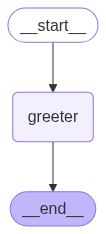

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [22]:
result = app.invoke({'message': "Darsha"})

In [26]:
result['message']
result['compliment']

'Hey Darsha how you doing today?  you did a great job!'